In [71]:
!rm *

rm: cannot remove 'sample_data': Is a directory


# Machine learning with RDkit - Predict solubility 

Now that we know how to handle molecule data we will try to do a first machine learning pipeline to predict solubility

In this exercise, we will use machine learning to predict solubility of molecules. For this purpose, we will borrow a dataset from rdkit that is originated from the Huuskonen dataset. We will try to predict Aqueous Solubility for molecules that is known as "logS". 


This exercise is divided into 3 parts: Preparing a dataset, training a model and preparing dataset for prediction and applying a predictive model.



## Preparing dataset




Download the training set from "https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf".



In [72]:
!wget https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf

--2022-04-02 16:16:14--  https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1376487 (1.3M) [text/plain]
Saving to: ‘solubility.train.sdf’

solubility.train.sd 100%[===================>]   1.31M  --.-KB/s    in 0.05s   

2022-04-02 16:16:14 (23.9 MB/s) - ‘solubility.train.sdf’ saved [1376487/1376487]



In [73]:
!ls

sample_data  solubility.train.sdf


In [74]:
!pip install numpy

In [75]:
!pip install rdkit-pypi


With the help of rdkit.Chem.SDMolSupplier, get list of molecules contained in this file. You should call this list as **molecule_list**. The option **removeHs=False** should be chosen. 



In [76]:
import rdkit
from rdkit import Chem

molecule_list = Chem.SDMolSupplier('solubility.train.sdf', removeHs=False)


Write a function named **calculate_descriptors(mol)** that allows us to calculate descriptors of a molecule. This function takes a Rdkit molecule as input and returns an array vector of descriptors.



In [77]:
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator

def calculate_descriptors(mol):

    all_descriptors = [ desc[0] for desc in Descriptors._descList]

    calculator = MolecularDescriptorCalculator(all_descriptors)
    calc = calculator.CalcDescriptors(mol)

    return calc


Apply the function **caluclate_descriptors** to the list of molecules **molecule_list** and store the result in a dataframe named **df**. Look at few rows of **df** to see whether the descriptors are calculated.

Get alslow the sollubity with the GetProp method



In [78]:
import pandas as pd

all_mol_desc = []

for mol in molecule_list:
    
    all_mol_desc.append(calculate_descriptors(mol))

df = pd.DataFrame(all_mol_desc)

print(df.head())

        0         1         2         3         4       5       6         7    \
0  2.211806  1.343750  2.211806  1.343750  0.468786  72.151  60.055  72.09390   
1  1.500000  1.500000  1.500000  1.500000  0.408362  70.135  60.055  70.07825   
2  2.231806  1.355000  2.231806  1.355000  0.462954  86.178  72.066  86.10955   
3  2.253472  0.898148  2.253472  0.898148  0.483890  86.178  72.066  86.10955   
4  2.243056  0.541667  2.243056  0.541667  0.424482  86.178  72.066  86.10955   

   8    9    ...  198  199  200  201  202  203  204  205  206  207  
0   32    0  ...    0    0    0    0    0    0    0    0    0    0  
1   30    0  ...    0    0    0    0    0    0    0    0    0    0  
2   38    0  ...    0    0    0    0    0    0    0    0    1    0  
3   38    0  ...    0    0    0    0    0    0    0    0    0    0  
4   38    0  ...    0    0    0    0    0    0    0    0    0    0  

[5 rows x 208 columns]


For each molecule from this dataset, we can get the aqueous solubility (logS) via attribute **getProp('SOL')**. Create a list that contains the aqueous solubility of all molecules from the **molecule_list** list. You should call this list by **labels**. Remember to convert these values to float format.




In [79]:
labels = []

for mol in molecule_list:
    labels.append(float(mol.GetProp('SOL')))

print("We have the following label : ", labels)

We have the following label :  [-3.18, -2.64, -3.84, -3.74, -3.55, -3.1, -3.3, -4.53, -3.85, -5.24, -3.52, -4.15, -2.54, -2.1, -3.23, -3.24, -3.82, -3.27, -4.44, -5.05, -2.68, -2.03, -1.87, -1.97, -4.0, -1.64, -2.36, -3.01, -4.24, -1.64, -2.21, -2.8, -2.77, -2.82, -3.37, -3.31, -3.2, -3.21, -3.11, -3.27, -4.06, -3.75, -3.77, -3.66, -3.89, -4.0, -4.64, -4.15, -2.82, -4.31, -4.17, -4.91, -5.22, -3.6, -3.77, -3.7, -4.29, -4.74, -4.72, -3.96, -4.14, -4.89, -4.63, -4.92, -5.26, -5.89, -6.96, -6.19, -6.0, -5.96, -6.68, -8.04, -6.74, -8.19, -7.02, -7.8, -8.8, -9.03, -4.97, -4.38, -7.42, -5.17, -6.89, -8.23, -8.0, -8.49, -8.66, -1.0, -0.63, -0.89, -1.17, -1.54, -1.9, -1.91, -3.14, -1.09, -1.6, -1.29, -1.32, -1.68, -2.0, -1.48, -2.18, -2.6, -3.04, -3.67, -1.41, -1.73, -1.59, -2.29, -1.62, -1.6, -1.85, -2.08, -2.38, -1.92, -2.03, -1.96, -2.96, -2.0, -2.43, -2.4, -2.73, -2.63, -2.63, -2.51, -2.69, -3.12, -3.07, -3.81, -2.3, -1.71, -3.12, -4.59, -3.99, -4.81, -1.64, -1.3, -3.22, -1.96, -2.54, -1.3

Plot the histogram of the "labels" list to see the distribution of the solubility of molecules. Do you have some comments about the aqueous solubility of molecules ?



In [80]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

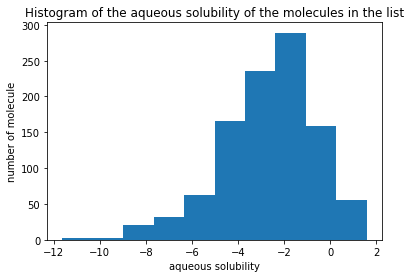

In [81]:
plt.hist(labels, 10)

plt.xlabel('aqueous solubility')
plt.ylabel('number of molecule')
plt.title(r'Histogram of the aqueous solubility of the molecules in the list')

plt.show()

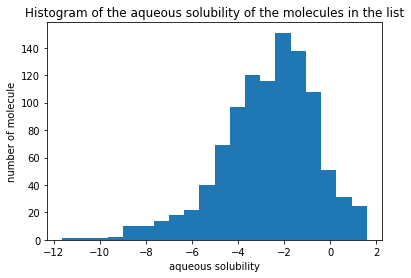

In [82]:
plt.hist(labels, 20)

plt.xlabel('aqueous solubility')
plt.ylabel('number of molecule')
plt.title(r'Histogram of the aqueous solubility of the molecules in the list')

plt.show()

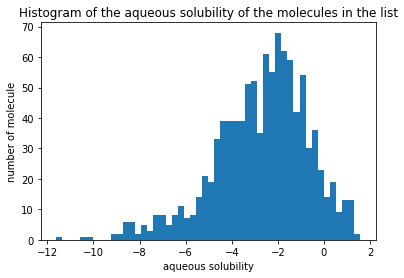

In [83]:
plt.hist(labels, 50)

plt.xlabel('aqueous solubility')
plt.ylabel('number of molecule')
plt.title(r'Histogram of the aqueous solubility of the molecules in the list')

plt.show()

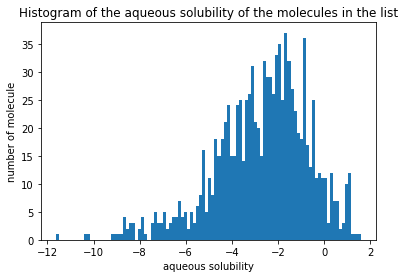

In [84]:
plt.hist(labels, 100)

plt.xlabel('aqueous solubility')
plt.ylabel('number of molecule')
plt.title(r'Histogram of the aqueous solubility of the molecules in the list')

plt.show()

### Feature Engineering 

Now, we have the **df** dataframe that contains the descriptors for molecules and the **labels** list that contains the solvant property of molecules.

Check the dataframe **df** to see whether it contains NaN values. How many row contained NaN values are there in the dataframe **df** ? Remove these rows from  **df** and **labels**.



In [85]:
df.isna().any(1)[df.isna().any(1) == True]

985    True
dtype: bool

In [86]:
df = df.dropna()
labels = labels[:985] + labels[986:]

In [87]:
df.isna().any(1)[df.isna().any(1) == True]

Series([], dtype: bool)


Apply the MinMaxScaler to the dataframe **df** to normalize the data.



In [88]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df = scaler.fit_transform(df)

Instanciate a linear regression and train it to predict the solubility from the features

In [89]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(df, labels)


Calculate the square root error for the dataset

In [90]:
from sklearn.metrics import mean_squared_error

print("We have a mean square error of : ", mean_squared_error(labels, reg.predict(df)))

We have a mean square error of :  0.25141600248436796


Plot the differences between prediction and labels

### Evaluating on test set



Download test set from "https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf"


Note: If there exists problem of reading the file solubility.test.sdf as
"RDKit ERROR: [09:28:36] ERROR: moving to the beginning of the next molecule
RDKit ERROR: [09:32:48] ERROR: Counts line too short: '' on line4"
so, go to the url, click "raw" and save this file by hand. The error will be gone away


In [91]:
!wget https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.test.sdf

--2022-04-02 16:16:36--  https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.test.sdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 245735 (240K) [text/plain]
Saving to: ‘solubility.test.sdf’

solubility.test.sdf 100%[===================>] 239.98K  --.-KB/s    in 0.03s   

2022-04-02 16:16:37 (8.86 MB/s) - ‘solubility.test.sdf’ saved [245735/245735]




Read molecules from this file and store them in a list named **list_molecule_test**.


In [93]:
molecule_list_test = Chem.SDMolSupplier('solubility.test.sdf', removeHs=False)


Take a molecule from the **list_molecule_test** and then calculate its descriptions thank to the **calculate_descriptors(mol)** function that you've coded above.



In [97]:
all_mol_test_desc = []

for mol in molecule_list_test:

    all_mol_test_desc.append(calculate_descriptors(mol))

df_test = pd.DataFrame(all_mol_test_desc)

print(df_test.head())

        0         1         2         3         4        5       6    \
0  2.277778  0.935185  2.277778  0.935185  0.483890   86.178  72.066   
1  2.263889  0.875000  2.263889  0.875000  0.500182  100.205  84.077   
2  3.550417  1.152778  3.550417  1.152778  0.435604   70.135  60.055   
3  2.267361  1.319444  2.267361  1.319444  0.392513   82.146  72.066   
4  3.479167  0.916667  3.479167  0.916667  0.432313   68.119  60.055   

          7    8    9    ...  198  199  200  201  202  203  204  205  206  207  
0   86.109550   38    0  ...    0    0    0    0    0    0    0    0    0    0  
1  100.125201   44    0  ...    0    0    0    0    0    0    0    0    0    0  
2   70.078250   30    0  ...    0    0    0    0    0    0    0    0    0    0  
3   82.078250   34    0  ...    0    0    0    0    0    0    0    0    0    0  
4   68.062600   28    0  ...    0    0    0    0    0    0    0    0    0    0  

[5 rows x 208 columns]



Apply **minmaxscaler** to these descriptors. Note that **minmaxscaler**  is one that you've created for the training (do not fit again, only transform !!)



In [98]:
scaler_test = MinMaxScaler()

df_test = scaler_test.fit_transform(df_test)


Use the model that you've trained to predict the aqueous solubility (logS) of the molecule. Compare to the real logS value of the molecule.



In [99]:
reg.predict(df_test)

array([-2.84727641e+10, -2.39015469e+10, -3.39797277e+10, -3.49395871e+10,
       -3.51527629e+10, -3.49207215e+10, -2.10485087e+10, -6.04135007e+10,
       -5.55363105e+10, -6.17292459e+10, -5.52863622e+10, -5.80847593e+10,
       -8.51588043e+10, -9.06054957e+10, -8.79742886e+10, -1.22328851e+11,
       -1.18514773e+11, -1.52994023e+11, -1.52533455e+11, -1.29530402e+11,
       -1.41264950e+11, -1.51907473e+11, -3.28151368e+10, -3.47957884e+10,
       -2.63200356e+10, -2.95525606e+10, -2.98336123e+10, -3.20078553e+10,
       -2.71910576e+10, -2.97919151e+10, -2.79746144e+10, -2.50988282e+10,
       -2.75024830e+10, -2.81746695e+10, -3.66467524e+10, -1.55169997e+10,
       -3.83286899e+10, -6.23431719e+10, -6.30949139e+10, -6.18850515e+10,
       -6.19165024e+10, -6.63325550e+10, -5.42078901e+10, -8.58430239e+10,
       -8.60479282e+10, -8.70217497e+10, -8.69280753e+10, -8.74727427e+10,
       -8.78742051e+10, -8.83684816e+10, -8.81878325e+10, -8.93738977e+10,
       -8.90774865e+10, -

Calculate the mean square root error of the model for this data. Compare it to the one of training set. Does it overfit ? 

In [101]:
labels_test = []

for mol in molecule_list_test:
    labels_test.append(float(mol.GetProp('SOL')))

print("We have the following label : ", labels_test)


print("We have a mean square error of : ", mean_squared_error(labels_test, reg.predict(df_test)))

We have the following label :  [-3.68, -4.26, -2.68, -2.59, -2.09, -2.15, -3.66, -2.77, -3.4, -3.04, -4.12, -5.21, -4.62, -4.17, -4.29, -6.35, -6.57, -8.6, -8.06, -2.68, -6.2, -7.92, -1.17, -2.31, -1.06, -1.74, -1.47, -2.09, -2.15, -2.37, -2.7, -2.89, -5.06, -4.43, -1.32, -6.32, -4.91, -2.55, -3.19, -3.54, -4.5, -5.65, -2.0, -5.2, -5.28, -6.02, -6.29, -7.16, -6.8, -7.91, -7.92, -7.68, -8.01, -9.15, -7.2, -4.4, -0.29, -0.4, -0.39, -1.14, -0.62, -1.55, -1.6, -1.22, -0.72, -1.6, -3.63, -1.2, 0.62, -0.68, -2.22, -2.28, -0.01, -3.17, -0.1, -0.6, -2.58, -0.99, -3.12, -0.2, -3.44, -2.14, -2.48, -2.65, -3.22, -5.33, 0.15, -0.66, -1.28, -1.92, -2.31, -3.8, -1.85, -4.4, -0.09, -0.24, -1.34, -1.85, -1.6, -0.42, -2.97, -4.37, -3.75, -3.43, -1.82, -2.35, -1.06, -2.34, -3.31, -6.29, -1.1, -2.75, -1.28, -1.92, -1.92, 0.4, -1.45, -0.84, -1.28, -0.17, -3.18, -2.16, -2.23, -2.12, -3.66, -2.57, -4.16, -2.36, 0.81, -2.21, -3.28, -4.86, -4.61, -2.41, -2.09, -2.32, -2.62, -2.54, -2.43, -3.7, -1.35, -0.97, -

Considering the big difference between the train error and the test error, there is a strong chance that it is due to overfitting but it would be necessary to look at it in detail to be able to really confirm it, it remains for the moment only an intuition

### Other models (bonus)

Try to do hyperparameter search to find better linear models (check regularisation) 



Try to test with support vector machine

Try to test with gradient boosting regressor

Try to test with a small Feedforward network